<a href="https://colab.research.google.com/github/sayyed-uoft/fullstackai/blob/main/05_Data_Analysis_with_Pandas_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Strata.ai - Artificial Intelligence Certificate 

# Module 1: Data Science for AI

# Data Analysis with Pandas - Part 2

## Learning Outcome

- Learn data analysis using pandas by a real example
- Learn more advanced features of pandas

## Topics
- [Project: Analyze COVID-19 Data](#project)
- [Dataset](#dataset)
- [Load Data](#load)
- [Explore Data](#explore)
- [Clean Data](#clean)
- [Transform Data](#transform)
- [Merge Data](#merge)
- [Store Data](#merge)
- [Exploratory Analysis](#analyze)

<a id="project"></a>
## Project: Analyze COVID-19 Data

The goal is to **analyze** and **visualize** the **number of COVID-19 cases** and **deaths** in **US** and individual **US states/counties** from the time pandemic started until today  

<a id="dataset"></a>
## Dataset

We will be using the data from **Johns Hopkins University (Center for Systems Science and Engineering)**. The following two main files will be used:

- **time_series_covid19_confirmed_US.csv:** The number of COVID-19 confirmed cases by date and by county (<a href='https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv' target='_blank'>link</a>)
- **time_series_covid19_deaths_US.csv:** The number of COVID-19 deaths by date and by county (<a href='https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv' target='_blank'>link</a>)

<a id="load"></a>
## Load Data

- Panda supports (<a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html' target='_blank'>IO Tools</a>) a set of top level reader functions (e.g. pandas.read_csv) that generally return a pandas object. 
- Some of them have corresponding writer methods (DataFrame.to_csv). 

| Format | Reader Function | Writer Method | 
| :-- | :-- | :-- |
| CSV, or any delimited text file | read_csv | to_csv |
| Fixed-Width Text File | read_fwf |   |
| JSON | read_json | to_json |
| HTML | read_html | to_html |
| Text in Local Clipboard | read_clipboard | to_clipboard |
| MS Excel | read_excel | to_excel |
| OpenDocument | read_excel |  |
| HDF5 Format | read_hdf | to_hdf |
| Feather Format | read_feather | to_feather |
| Parquet Format | read_parquet | to_parquet |
| ORC Format | read_orc |   |
| Magpack | read_msgpack | to_msgpack |
| Stata | read_stata | to_stata |
| SAS | read_sas |   |
| SPSS | read_spss |   |
| Python Pickle Format | read_pickle | to_pickle |
| SQL | read_sql | to_sql |
| Google BigQuery | read_gbq | to_gbq  |

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:
# Loading confirmed cases 
df_confirmed = pd.read_csv('time_series_covid19_confirmed_US.csv')
display(df_confirmed.shape) # getting the sizes (rows x cols)
df_confirmed.head() # shows the firt 5 rows

(3340, 317)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2417,2435,2456,2481,2506,2529,2554,2580,2597,2617
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,7523,7596,7646,7696,7772,7849,7933,8038,8131,8199
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1117,1123,1128,1130,1134,1137,1145,1151,1157,1160
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,973,978,986,993,1004,1008,1011,1024,1036,1136
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2488,2518,2549,2574,2594,2648,2683,2704,2735,2754


In [ ]:
# Loading death cases 
df_deaths = pd.read_csv('time_series_covid19_deaths_US.csv')
display(df_deaths.shape)
df_deaths.head(7) # shows the firt 7 rows 

(3340, 318)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,36,36,36,36,37,37,39,39,39,39
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,84,84,84,84,84,84,84,84,84,84
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,9,9,9,9,9,10,10,10,10,10
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,17,17,17,17,17,18,18,18,17,17
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,34,34,34,34,34,35,35,35,36,36
5,84001011,US,USA,840,1011.0,Bullock,Alabama,US,32.100305,-85.712655,...,19,19,19,19,19,19,19,19,19,19
6,84001013,US,USA,840,1013.0,Butler,Alabama,US,31.753001,-86.680575,...,41,41,41,41,41,41,41,41,41,41


<a id="explore"></a>
## Explore Data

In [ ]:
# Displaying all rows
df_confirmed

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2417,2435,2456,2481,2506,2529,2554,2580,2597,2617
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,7523,7596,7646,7696,7772,7849,7933,8038,8131,8199
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1117,1123,1128,1130,1134,1137,1145,1151,1157,1160
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,973,978,986,993,1004,1008,1011,1024,1036,1136
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2488,2518,2549,2574,2594,2648,2683,2704,2735,2754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,1108,1156,1178,1192,1252,1271,1298,1336,1360,1371
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,686,719,729,760,796,835,869,894,901,920
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,206,208,218,227,253,263,274,290,298,315


In [ ]:
# Get detailed info 
df_confirmed.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 317 columns):
 #   Column          Dtype  
---  ------          -----  
 0   UID             int64  
 1   iso2            object 
 2   iso3            object 
 3   code3           int64  
 4   FIPS            float64
 5   Admin2          object 
 6   Province_State  object 
 7   Country_Region  object 
 8   Lat             float64
 9   Long_           float64
 10  Combined_Key    object 
 11  1/22/20         int64  
 12  1/23/20         int64  
 13  1/24/20         int64  
 14  1/25/20         int64  
 15  1/26/20         int64  
 16  1/27/20         int64  
 17  1/28/20         int64  
 18  1/29/20         int64  
 19  1/30/20         int64  
 20  1/31/20         int64  
 21  2/1/20          int64  
 22  2/2/20          int64  
 23  2/3/20          int64  
 24  2/4/20          int64  
 25  2/5/20          int64  
 26  2/6/20          int64  
 27  2/7/20          int64  
 28  2/8/20          i

In [ ]:
# pandas infers the column data types automatically (you can overwrite that behavior) 
df_confirmed.dtypes

UID           int64
iso2         object
iso3         object
code3         int64
FIPS        float64
             ...   
11/18/20      int64
11/19/20      int64
11/20/20      int64
11/21/20      int64
11/22/20      int64
Length: 317, dtype: object

In [ ]:
# Descriptive Statistics (only numeric columns)
df_confirmed.describe()


,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
count,3.340000e+03,3340.000000,3330.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,...,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000
mean,8.342958e+07,834.491617,33061.684685,36.707212,-88.601474,0.000299,0.000299,0.000599,0.000599,0.001497,...,3218.834431,3268.747305,3308.640719,3356.650000,3404.703593,3455.716766,3511.990719,3570.674551,3623.987126,3666.721257
std,4.315345e+06,36.498055,18638.940791,9.062922,21.718982,0.017303,0.017303,0.024467,0.024467,0.038668,...,11612.336706,11742.918786,11873.064028,11998.368878,12121.624861,12257.029746,12431.534457,12592.563054,12752.848293,12878.973730
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.401811e+07,840.000000,19079.500000,33.895587,-97.790204,0.000000,0.000000,0.000000,0.000000,0.000000,...,277.000000,284.750000,290.000000,297.000000,302.000000,309.750000,318.750000,324.750000,333.750000,338.000000
50%,8.402921e+07,840.000000,31014.000000,38.002344,-89.486710,0.000000,0.000000,0.000000,0.000000,0.000000,...,759.500000,774.000000,788.500000,800.500000,816.000000,827.500000,845.000000,873.000000,890.500000,896.500000
75%,8.404612e+07,840.000000,47130.500000,41.573069,-82.311265,0.000000,0.000000,0.000000,0.000000,0.000000,...,2056.250000,2100.000000,2127.250000,2167.500000,2193.500000,2226.750000,2272.250000,2328.000000,2369.500000,2399.250000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,1.000000,1.000000,1.000000,1.000000,1.000000,...,332865.000000,336549.000000,339560.000000,342343.000000,344523.000000,348336.000000,353232.000000,357451.000000,361869.000000,364520.000000


<a id="clean"></a>
## Clean Data

- The data is mostly clean and no missing data
- We are going to drop unused columns (cleaner and less memory usage)
- Rename some columns to more meaningful names
- We will check for negative numbers

In [ ]:
# re-display data
df_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2417,2435,2456,2481,2506,2529,2554,2580,2597,2617
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,7523,7596,7646,7696,7772,7849,7933,8038,8131,8199
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1117,1123,1128,1130,1134,1137,1145,1151,1157,1160
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,973,978,986,993,1004,1008,1011,1024,1036,1136
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2488,2518,2549,2574,2594,2648,2683,2704,2735,2754


In [ ]:
# dropping the unused columns (dropping in-place)
df_confirmed.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Country_Region', 'Combined_Key']
                  , axis='columns', inplace=True)
df_confirmed.head()

,Admin2,Province_State,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
0,Autauga,Alabama,32.539527,-86.644082,0,0,0,0,0,0,...,2417,2435,2456,2481,2506,2529,2554,2580,2597,2617
1,Baldwin,Alabama,30.727750,-87.722071,0,0,0,0,0,0,...,7523,7596,7646,7696,7772,7849,7933,8038,8131,8199
2,Barbour,Alabama,31.868263,-85.387129,0,0,0,0,0,0,...,1117,1123,1128,1130,1134,1137,1145,1151,1157,1160
3,Bibb,Alabama,32.996421,-87.125115,0,0,0,0,0,0,...,973,978,986,993,1004,1008,1011,1024,1036,1136
4,Blount,Alabama,33.982109,-86.567906,0,0,0,0,0,0,...,2488,2518,2549,2574,2594,2648,2683,2704,2735,2754


In [ ]:
# Renaming the columns
df_confirmed.rename(columns={
    'Admin2': 'County',
    'Province_State': 'State',
    'Lat': 'Latitude',
    'Long_': 'Longitude'
}, inplace=True)

df_confirmed.head()

,County,State,Latitude,Longitude,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
0,Autauga,Alabama,32.539527,-86.644082,0,0,0,0,0,0,...,2417,2435,2456,2481,2506,2529,2554,2580,2597,2617
1,Baldwin,Alabama,30.727750,-87.722071,0,0,0,0,0,0,...,7523,7596,7646,7696,7772,7849,7933,8038,8131,8199
2,Barbour,Alabama,31.868263,-85.387129,0,0,0,0,0,0,...,1117,1123,1128,1130,1134,1137,1145,1151,1157,1160
3,Bibb,Alabama,32.996421,-87.125115,0,0,0,0,0,0,...,973,978,986,993,1004,1008,1011,1024,1036,1136
4,Blount,Alabama,33.982109,-86.567906,0,0,0,0,0,0,...,2488,2518,2549,2574,2594,2648,2683,2704,2735,2754


In [ ]:
# Checking for negative numbers ia all columns named as dates
display(df_confirmed.columns[4:]) # exclude the first 4 columns
df_confirmed.iloc[:, 4:].head(1) # check

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '11/13/20', '11/14/20', '11/15/20', '11/16/20', '11/17/20', '11/18/20',
       '11/19/20', '11/20/20', '11/21/20', '11/22/20'],
      dtype='object', length=306)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
0,0,0,0,0,0,0,0,0,0,0,...,2417,2435,2456,2481,2506,2529,2554,2580,2597,2617


In [ ]:
display((df_confirmed.iloc[:, 4:] < 0).head(1)) # create boolean data frame by comparison operators
(df_confirmed.iloc[:, 4:] < 0).to_numpy().sum()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


0

<a id="transform"></a>
## Transform Data

- Currently all dates are defined as column titles. It is easier to make one column for **'Report_Date'** and create one row for each date and each county
- Let's change the row index to something meaningful 

### Pivoting and Unpivoting

<center><img src="attachment:image.png" width="70%"></center>

In [ ]:
# Unpivoting
df_confirmed = df_confirmed.melt(
    id_vars = ['State', 'County', 'Latitude', 'Longitude'], # ID columns
    value_vars = df_confirmed.columns[4:], # variable columns
    var_name = 'Report_Date', # Column name for variables
    value_name = 'Confirmed' # column names for values
)

df_confirmed.tail()

,State,County,Latitude,Longitude,Report_Date,Confirmed
1022035,Wyoming,Teton,43.935225,-110.589080,11/22/20,1371
1022036,Wyoming,Uinta,41.287818,-110.547578,11/22/20,920
1022037,Wyoming,Unassigned,0.000000,0.000000,11/22/20,0
1022038,Wyoming,Washakie,43.904516,-107.680187,11/22/20,315
1022039,Wyoming,Weston,43.839612,-104.567488,11/22/20,372


In [ ]:
# Pivoting test
pd.pivot_table(df_confirmed, values='Confirmed', 
               index=['State', 'County','Latitude', 'Longitude'],
               columns=['Report_Date'])

Report_Date                               1/22/20  1/23/20  1/24/20  1/25/20  \
State   County     Latitude  Longitude                                         
Alabama Autauga    32.539527 -86.644082         0        0        0        0   
        Baldwin    30.727750 -87.722071         0        0        0        0   
        Barbour    31.868263 -85.387129         0        0        0        0   
        Bibb       32.996421 -87.125115         0        0        0        0   
        Blount     33.982109 -86.567906         0        0        0        0   
...                                           ...      ...      ...      ...   
Wyoming Teton      43.935225 -110.589080        0        0        0        0   
        Uinta      41.287818 -110.547578        0        0        0        0   
        Unassigned 0.000000   0.000000          0        0        0        0   
        Washakie   43.904516 -107.680187        0        0        0        0   
        Weston     43.839612 -104.567488        0        0        0        0   

Report_Date                               1/26/20  1/27/20  1/28/20  1/29/20  \
State   County     Latitude  Longitude                                         
Alabama Autauga    32.539527 -86.644082         0        0        0        0   
        Baldwin    30.727750 -87.722071         0        0        0        0   
        Barbour    31.868263 -85.387129         0        0        0        0   
        Bibb       32.996421 -87.125115         0        0        0        0   
        Blount     33.982109 -86.567906         0        0        0        0   
...                                           ...      ...      ...      ...   
Wyoming Teton      43.935225 -110.589080        0        0        0        0   
        Uinta      41.287818 -110.547578        0        0        0        0   
        Unassigned 0.000000   0.000000          0        0        0        0   
        Washakie   43.904516 -107.680187        0        0        0        0   
        Weston     43.839612 -104.567488        0        0        0        0   

Report_Date                               1/30/20  1/31/20  ...  9/28/20  \
State   County     Latitude  Longitude                      ...            
Alabama Autauga    32.539527 -86.644082         0        0  ...     1776   
        Baldwin    30.727750 -87.722071         0        0  ...     5550   
        Barbour    31.868263 -85.387129         0        0  ...      883   
        Bibb       32.996421 -87.125115         0        0  ...      653   
        Blount     33.982109 -86.567906         0        0  ...     1626   
...                                           ...      ...  ...      ...   
Wyoming Teton      43.935225 -110.589080        0        0  ...      560   
        Uinta      41.287818 -110.547578        0        0  ...      354   
        Unassigned 0.000000   0.000000          0        0  ...        0   
        Washakie   43.904516 -107.680187        0        0  ...      115   
        Weston     43.839612 -104.567488        0        0  ...       36   

Report_Date                               9/29/20  9/3/20  9/30/20  9/4/20  \
State   County     Latitude  Longitude                                       
Alabama Autauga    32.539527 -86.644082      1785    1462     1792    1474   
        Baldwin    30.727750 -87.722071      5592    4626     5954    4654   
        Barbour    31.868263 -85.387129       892     770      894     770   
        Bibb       32.996421 -87.125115       660     567      668     571   
        Blount     33.982109 -86.567906      1633    1376     1636    1392   
...                                           ...     ...      ...     ...   
Wyoming Teton      43.935225 -110.589080      560     435      577     440   
        Uinta      41.287818 -110.547578      354     305      357     308   
        Unassigned 0.000000   0.000000          0       0        0       0   
        Washakie   43.904516 -107.680187      116     109      116     

In [ ]:
# Let's change the data type to date
display(df_confirmed.Report_Date.dtype)
# change a Series to a datetime
df_confirmed.Report_Date = pd.to_datetime(df_confirmed.Report_Date, 
                                          infer_datetime_format=True) 
display(df_confirmed.Report_Date.dtype)
df_confirmed.head()

dtype('O')

dtype('<M8[ns]')

,State,County,Latitude,Longitude,Report_Date,Confirmed
0,Alabama,Autauga,32.539527,-86.644082,2020-01-22,0
1,Alabama,Baldwin,30.727750,-87.722071,2020-01-22,0
2,Alabama,Barbour,31.868263,-85.387129,2020-01-22,0
3,Alabama,Bibb,32.996421,-87.125115,2020-01-22,0
4,Alabama,Blount,33.982109,-86.567906,2020-01-22,0


<a id="merge"></a>
## Merge Data

- We want to merge confirmed cases and death cases into one DataFrame 

In [ ]:
# Let's apply all changes to Deaths DataFrame too
df_deaths.drop(['UID', 'iso2', 'iso3', 'code3', # drop unused columns
                'FIPS', 'Country_Region', 'Combined_Key'],
                axis='columns', inplace=True)

df_deaths.rename(columns={ # re\anme columns
    'Admin2': 'County',
    'Province_State': 'State',
    'Lat': 'Latitude',
    'Long_': 'Longitude'
}, inplace=True)

df_deaths = df_deaths.melt( # unpivot
    id_vars = ['State', 'County', 'Latitude', 'Longitude', 'Population'], 
    value_vars = df_deaths.columns[5:], 
    var_name = 'Report_Date', 
    value_name = 'Deaths' 
)

df_deaths.Report_Date = pd.to_datetime(df_deaths.Report_Date, # change column data type
                                          infer_datetime_format=True)

df_deaths

,State,County,Latitude,Longitude,Population,Report_Date,Deaths
0,Alabama,Autauga,32.539527,-86.644082,55869,2020-01-22,0
1,Alabama,Baldwin,30.727750,-87.722071,223234,2020-01-22,0
2,Alabama,Barbour,31.868263,-85.387129,24686,2020-01-22,0
3,Alabama,Bibb,32.996421,-87.125115,22394,2020-01-22,0
4,Alabama,Blount,33.982109,-86.567906,57826,2020-01-22,0
...,...,...,...,...,...,...,...
1022035,Wyoming,Teton,43.935225,-110.589080,23464,2020-11-22,2
1022036,Wyoming,Uinta,41.287818,-110.547578,20226,2020-11-22,4
1022037,Wyoming,Unassigned,0.000000,0.000000,0,2020-11-22,0
1022038,Wyoming,Washakie,43.904516,-107.680187,7805,2020-11-22,7


In [ ]:
# Merge both DataFrames
df = pd.merge(df_confirmed, df_deaths)
df

,State,County,Latitude,Longitude,Report_Date,Confirmed,Population,Deaths
0,Alabama,Autauga,32.539527,-86.644082,2020-01-22,0,55869,0
1,Alabama,Baldwin,30.727750,-87.722071,2020-01-22,0,223234,0
2,Alabama,Barbour,31.868263,-85.387129,2020-01-22,0,24686,0
3,Alabama,Bibb,32.996421,-87.125115,2020-01-22,0,22394,0
4,Alabama,Blount,33.982109,-86.567906,2020-01-22,0,57826,0
...,...,...,...,...,...,...,...,...
928399,Wyoming,Sweetwater,41.659439,-108.882788,2020-11-22,1421,42343,6
928400,Wyoming,Teton,43.935225,-110.589080,2020-11-22,1371,23464,2
928401,Wyoming,Uinta,41.287818,-110.547578,2020-11-22,920,20226,4
928402,Wyoming,Unassigned,0.000000,0.000000,2020-11-22,0,0,0


In [ ]:
# Let's look at the variables in memory 
%whos

Variable       Type         Data/Info
-------------------------------------
df             DataFrame              State      Coun<...>[928404 rows x 8 columns]
df_confirmed   DataFrame               State      Cou<...>1022040 rows x 6 columns]
df_deaths      DataFrame               State      Cou<...>1022040 rows x 7 columns]
display        function     <function display at 0x7ffa1818a9e0>
np             module       <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
opts           dict         n=2
pd             module       <module 'pandas' from '/o<...>ages/pandas/__init__.py'>
plt            module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>


In [ ]:
# We don't need "df_confirmed" and "df_deaths". 
# Let's remove the large ones from memory
del df_confirmed, df_deaths
%whos

Variable   Type         Data/Info
---------------------------------
df         DataFrame              State      Coun<...>[928404 rows x 8 columns]
display    function     <function display at 0x7ffa1818a9e0>
np         module       <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
opts       dict         n=2
pd         module       <module 'pandas' from '/o<...>ages/pandas/__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>


<a id="store"></a>
## Store Data

In [ ]:
# Store in a CSV file (zipped)
opts = dict(method='zip', archive_name='covid19-clean.csv')  
df.to_csv('covid19-clean.zip', index=False, compression=opts)

<a id="visualize"></a>
## Exploratory Analysis


In [ ]:
# Let's create two new usefil columns: Confirmed_Pct, Deaths_Pct (confirmed/death per capita percentage)
df['Confirmed_Pct'] = (df.Confirmed * 100.) / df.Population
df['Deaths_Pct'] = (df.Deaths * 100.) / df.Population
df['Deaths_Ratio'] = df.Deaths  / df.Confirmed
df

,State,County,Latitude,Longitude,Report_Date,Confirmed,Population,Deaths,Confirmed_Pct,Deaths_Pct,Deaths_Ratio
0,Alabama,Autauga,32.539527,-86.644082,2020-01-22,0,55869,0,0.000000,0.000000,NaN
1,Alabama,Baldwin,30.727750,-87.722071,2020-01-22,0,223234,0,0.000000,0.000000,NaN
2,Alabama,Barbour,31.868263,-85.387129,2020-01-22,0,24686,0,0.000000,0.000000,NaN
3,Alabama,Bibb,32.996421,-87.125115,2020-01-22,0,22394,0,0.000000,0.000000,NaN
4,Alabama,Blount,33.982109,-86.567906,2020-01-22,0,57826,0,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
928399,Wyoming,Sweetwater,41.659439,-108.882788,2020-11-22,1421,42343,6,3.355927,0.014170,0.004222
928400,Wyoming,Teton,43.935225,-110.589080,2020-11-22,1371,23464,2,5.842994,0.008524,0.001459
928401,Wyoming,Uinta,41.287818,-110.547578,2020-11-22,920,20226,4,4.548601,0.019777,0.004348
928402,Wyoming,Unassigned,0.000000,0.000000,2020-11-22,0,0,0,NaN,NaN,NaN


In [ ]:
# Confirmed/deaths data is accumulated. So for now let's focus on the last dates
last_date = df.Report_Date.max()
display(last_date)


# Also, looks like thge population is zero for some of the rows and that makes the percentages NaN or Inf. 
# Let's filter them out
df[(df.Population > 0) & (df.Report_Date == last_date)]





Timestamp('2020-11-22 00:00:00')

,State,County,Latitude,Longitude,Report_Date,Confirmed,Population,Deaths,Confirmed_Pct,Deaths_Pct,Deaths_Ratio
925370,Alabama,Autauga,32.539527,-86.644082,2020-11-22,2617,55869,39,4.684172,0.069806,0.014903
925371,Alabama,Baldwin,30.727750,-87.722071,2020-11-22,8199,223234,84,3.672828,0.037629,0.010245
925372,Alabama,Barbour,31.868263,-85.387129,2020-11-22,1160,24686,10,4.699020,0.040509,0.008621
925373,Alabama,Bibb,32.996421,-87.125115,2020-11-22,1136,22394,17,5.072787,0.075913,0.014965
925374,Alabama,Blount,33.982109,-86.567906,2020-11-22,2754,57826,36,4.762564,0.062256,0.013072
...,...,...,...,...,...,...,...,...,...,...,...
928398,Wyoming,Sheridan,44.790489,-106.886239,2020-11-22,1652,30485,10,5.419059,0.032803,0.006053
928399,Wyoming,Sweetwater,41.659439,-108.882788,2020-11-22,1421,42343,6,3.355927,0.014170,0.004222
928400,Wyoming,Teton,43.935225,-110.589080,2020-11-22,1371,23464,2,5.842994,0.008524,0.001459
928401,Wyoming,Uinta,41.287818,-110.547578,2020-11-22,920,20226,4,4.548601,0.019777,0.004348


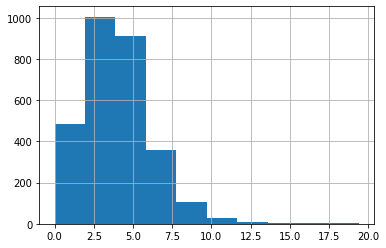

In [ ]:
# Let's look at the distribution of the confirmed percentage using histogram
df[(df.Population > 0) & (df.Report_Date == last_date)].Confirmed_Pct.hist()
plt.show()

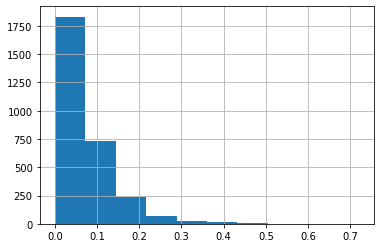

In [ ]:
# Let's look at the distribution of the deaths percentage using histogram
ax = df[(df.Population > 0) & (df.Report_Date == last_date)].Deaths_Pct.hist()

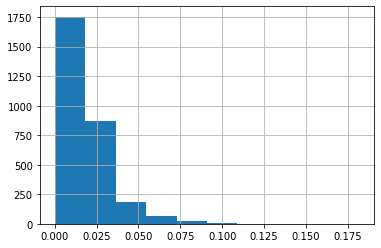

In [ ]:
ax = df[(df.Population > 0) & (df.Report_Date == last_date)].Deaths_Ratio.hist()

In [ ]:
# Let's get a references to both Confirmed and Death columns
cols_data = df[['Confirmed', 'Deaths']]

# Lets find the max confirmed and deaths cases 
display(cols_data.max())

# Let's find the State, County, and dates
display(df.loc[cols_data.idxmax()]) # using index

Confirmed    280896
Deaths         7338
dtype: int64

,State,County,Latitude,Longitude,Report_Date,Confirmed,Population,Deaths,Confirmed_Pct,Deaths_Pct,Deaths_Ratio
925946,Illinois,Cook,41.841448,-87.816588,2020-11-22,280896,5150233,6303,5.454045,0.122383,0.022439
927151,New York,Queens,40.710881,-73.816847,2020-11-22,85777,2253858,7338,3.805785,0.325575,0.085547


In [ ]:
# Lets find the max confirmed and deaths cases on Nov 01, 2020
cols_data[df.Report_Date == '2020-11-01']
display(cols_data[df.Report_Date == '2020-11-01'].max())

# Let's find the State and County
display(df.loc[cols_data[df.Report_Date == '2020-11-01'].idxmax()]) # using index

Confirmed    193102
Deaths         7297
dtype: int64

,State,County,Latitude,Longitude,Report_Date,Confirmed,Population,Deaths,Confirmed_Pct,Deaths_Pct,Deaths_Ratio
862232,Illinois,Cook,41.841448,-87.816588,2020-11-01,193102,5150233,5500,3.749384,0.106791,0.028482
863437,New York,Queens,40.710881,-73.816847,2020-11-01,77649,2253858,7297,3.445159,0.323756,0.093974


In [ ]:
# Let's group/aggregate data by State
gb = df[df.Report_Date == last_date].groupby(by='State')[['Confirmed', 'Deaths', 'Population']]
print(type(gb))
dfg = gb.sum()
dfg.head(10)

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Confirmed,Deaths,Population
State,,,
Alabama,230383,3424,4866136
Alaska,27566,101,724553
Arizona,101953,2386,2628719
Arkansas,144190,2341,2987692
California,480810,7615,18178450
Colorado,148234,2078,4458100
Connecticut,76221,3638,2710530
Delaware,31808,748,973764
Diamond Princess,49,0,0


In [ ]:
# Add percentages and ratios
dfg['Confirmed_Pct'] = (dfg.Confirmed * 100.) / dfg.Population
dfg['Deaths_Pct'] = (dfg.Deaths * 100.) / dfg.Population
dfg['Deaths_Ratio'] = dfg.Deaths  / dfg.Confirmed
dfg.head()

,Confirmed,Deaths,Population,Confirmed_Pct,Deaths_Pct,Deaths_Ratio
State,,,,,,
Alabama,230383,3424,4866136,4.734414,0.070364,0.014862
Alaska,27566,101,724553,3.804553,0.013940,0.003664
Arizona,101953,2386,2628719,3.878429,0.090767,0.023403
Arkansas,144190,2341,2987692,4.826133,0.078355,0.016236
California,480810,7615,18178450,2.644945,0.041890,0.015838


In [ ]:
# Find maximums among States
display(dfg.max())
dfg.loc[dfg.idxmax()]

Confirmed        9.347020e+05
Deaths           2.683000e+04
Population       2.205081e+07
Confirmed_Pct             inf
Deaths_Pct                inf
Deaths_Ratio     5.477326e-02
dtype: float64

,Confirmed,Deaths,Population,Confirmed_Pct,Deaths_Pct,Deaths_Ratio
State,,,,,,
Florida,934702,17902,21431323,4.361383,0.083532,0.019153
New York,511305,26830,16867362,3.031328,0.159065,0.052474
Texas,810171,16386,22050811,3.674110,0.074310,0.020225
Diamond Princess,49,0,0,inf,NaN,0.000000
Grand Princess,103,3,0,inf,inf,0.029126
New Jersey,306007,16761,8882190,3.445175,0.188703,0.054773


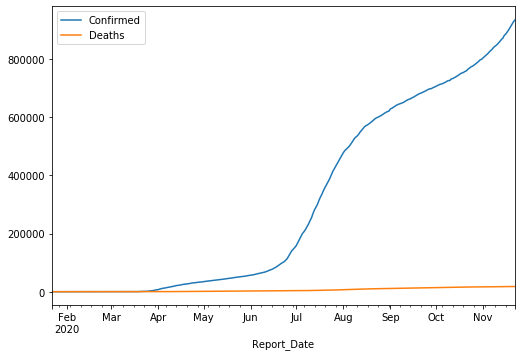

In [ ]:
# Let's plot the number cases and deaths in Florida over time

florida_cases = df[df.State == 'Florida'].groupby(by='Report_Date')[['Confirmed', 'Deaths']].sum()

florida_cases.plot(figsize=(8.3,5.5)) # width & height are in inches
plt.show()

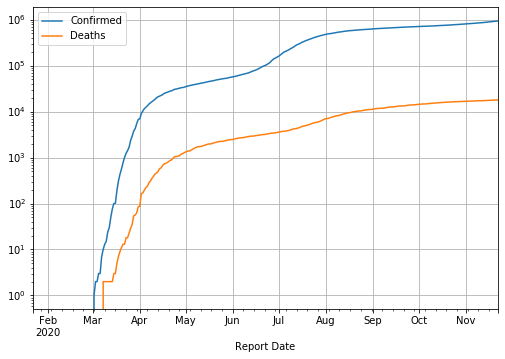

In [ ]:
# logarithmic plot
px = 1/plt.rcParams['figure.dpi']
ax = florida_cases.plot(logy=True, figsize=(600*px,400*px))
ax.set_xlabel('Report Date')
ax.grid()
plt.show()

In [ ]:
# let's get daily cases from accumulated data 

florida_daily = florida_cases.diff()
florida_daily

,Confirmed,Deaths
Report_Date,,
2020-01-22,NaN,NaN
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
...,...,...
2020-11-18,7880.0,86.0
2020-11-19,9060.0,79.0
2020-11-20,9052.0,79.0


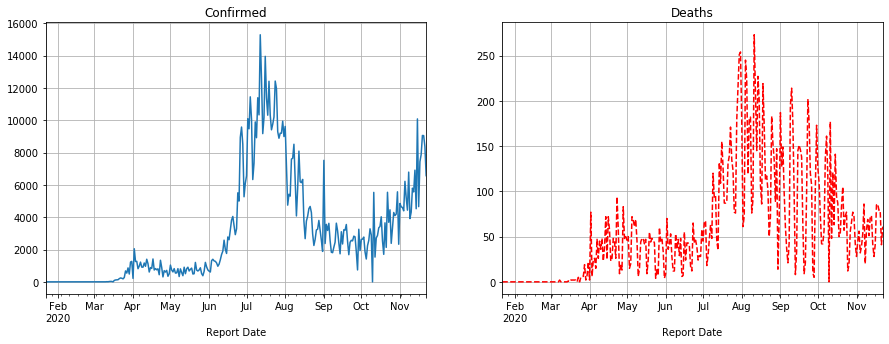

In [ ]:
florida_daily.iloc[0] = [0., 0.]
fig, axes = plt.subplots(ncols=2, figsize=(15,5))

ax1 = florida_daily['Confirmed'].plot(ax=axes[0])
ax2 = florida_daily['Deaths'].plot(ax=axes[1], ls='--', color='red')
ax1.set_xlabel('Report Date')
ax2.set_xlabel('Report Date')
ax1.set_title('Confirmed')
ax2.set_title('Deaths')
ax1.grid()
ax2.grid()
plt.show()